# 1. Install and Import Dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'C:\python 37\python.exe -m pip install --upgrade pip' command.


In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\AjeetChansauria/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-2 Python-3.10.4 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [6]:
img = "OIP.jpg"

In [7]:
results = model(img)
results.print()

image 1/1: 234x327 5 persons
Speed: 41.8ms pre-process, 271.2ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


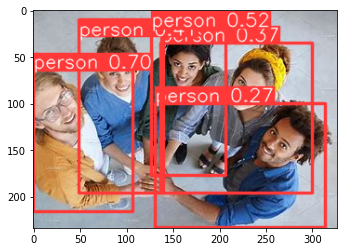

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[164, 169, 175],
         [164, 169, 175],
         [163, 168, 174],
         ...,
         [160, 165, 171],
         [160, 165, 171],
         [159, 164, 170]],
 
        [[163, 168, 174],
         [163, 168, 174],
         [162, 167, 173],
         ...,
         [156, 161, 167],
         [155, 160, 166],
         [155, 160, 166]],
 
        [[162, 167, 173],
         [161, 166, 172],
         [160, 165, 171],
         ...,
         [154, 159, 165],
         [153, 158, 164],
         [153, 158, 164]],
 
        ...,
 
        [[141, 159, 171],
         [144, 162, 174],
         [148, 166, 178],
         ...,
         [183, 188, 194],
         [184, 189, 195],
         [183, 188, 194]],
 
        [[141, 159, 171],
         [142, 160, 172],
         [144, 162, 174],
         ...,
         [182, 187, 193],
         [180, 185, 191],
         [180, 185, 191]],
 
        [[143, 161, 173],
         [144, 162, 174],
         [147, 165, 177],
         ...,
         [182, 187, 193],
  

# 4. Real Time Detections

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [11]:
import uuid   # Unique identifier
import os
import time

In [12]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 50 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-225-gbb9706e Python-3.10.4 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s

# 6. Load Custom Model

In [13]:
import os
os.getcwd()

'C:\\Users\\AjeetChansauria\\Downloads\\drowsiness\\YOLO-Drowsiness-Detection-main'

In [ ]:
c= b

In [21]:
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path = "best.pt",force_reload= True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\AjeetChansauria/.cache\torch\hub\master.zip
YOLOv5  2023-10-2 Python-3.10.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [22]:
model1

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [23]:
img = "img_8.jpg"

In [24]:
results = model1(img)

In [25]:
results.print()

image 1/1: 500x1020 2 Helmets
Speed: 14.3ms pre-process, 111.9ms inference, 0.0ms NMS per image at shape (1, 3, 320, 640)


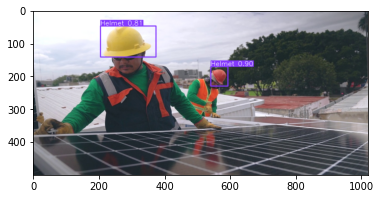

In [26]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
cap = cv2.VideoCapture("pexels-los-muertos-crew-8853531 (1080p).mp4")
while True:
    ret, frame = cap.read()
    
    # Make detections 
    results = model1(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()